# Лабораторная работа №1 Крайников И. А.

## Housing Price Data

About Dataset
Description:
This dataset contains various features of residential properties along with their corresponding prices. It is suitable for exploring and analyzing factors influencing housing prices and for building predictive models to estimate the price of a property based on its attributes.

Features:

price: The price of the property.
area: The total area of the property in square feet.
bedrooms: The number of bedrooms in the property.
bathrooms: The number of bathrooms in the property.
stories: The number of stories (floors) in the property.
mainroad: Indicates whether the property is located on a main road (binary: yes/no).
guestroom: Indicates whether the property has a guest room (binary: yes/no).
basement: Indicates whether the property has a basement (binary: yes/no).
hotwaterheating: Indicates whether the property has hot water heating (binary: yes/no).
airconditioning: Indicates whether the property has air conditioning (binary: yes/no).
parking: The number of parking spaces available with the property.
prefarea: Indicates whether the property is in a preferred area (binary: yes/no).
furnishingstatus: The furnishing status of the property (e.g., furnished, semi-furnished, unfurnished).

Usage:

This dataset can be used for exploratory data analysis to understand the relationships between different housing features and prices.
It can also be used to build machine learning models for predicting housing prices based on the given features.
License:
This dataset is made available under the Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.

# Основные характеристики датасета.

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

data = pd.read_csv('./Housing_Price_Data.csv', sep=",")

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [23]:
# Количество строк и столбцов
data.shape

(545, 13)

In [24]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 545


In [25]:
# Список колонок
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [26]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [27]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

price - 0
area - 0
bedrooms - 0
bathrooms - 0
stories - 0
mainroad - 0
guestroom - 0
basement - 0
hotwaterheating - 0
airconditioning - 0
parking - 0
prefarea - 0
furnishingstatus - 0


In [28]:
# Основные статистические характеристки набора данных
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:

# Определим уникальные значения для целевого признака
data['bedrooms'].unique()

array([4, 3, 5, 2, 6, 1])

# Визуальное исследование датасета

Диаграмма рассеивания

<Axes: xlabel='area', ylabel='price'>

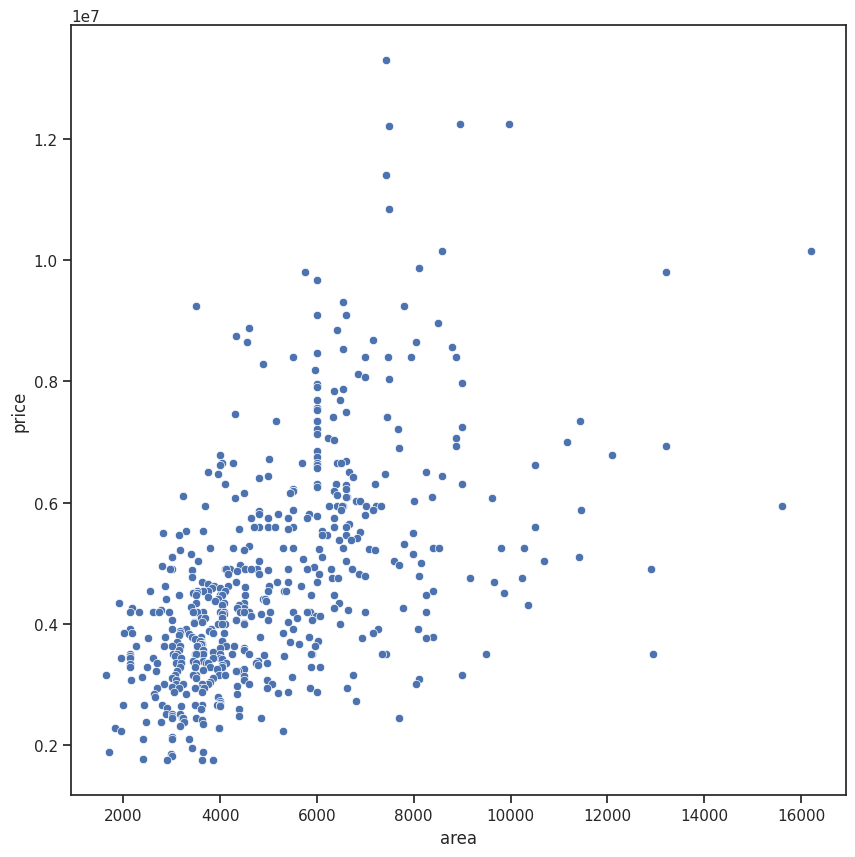

In [30]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='area', y='price', data=data)

<Axes: xlabel='area', ylabel='price'>

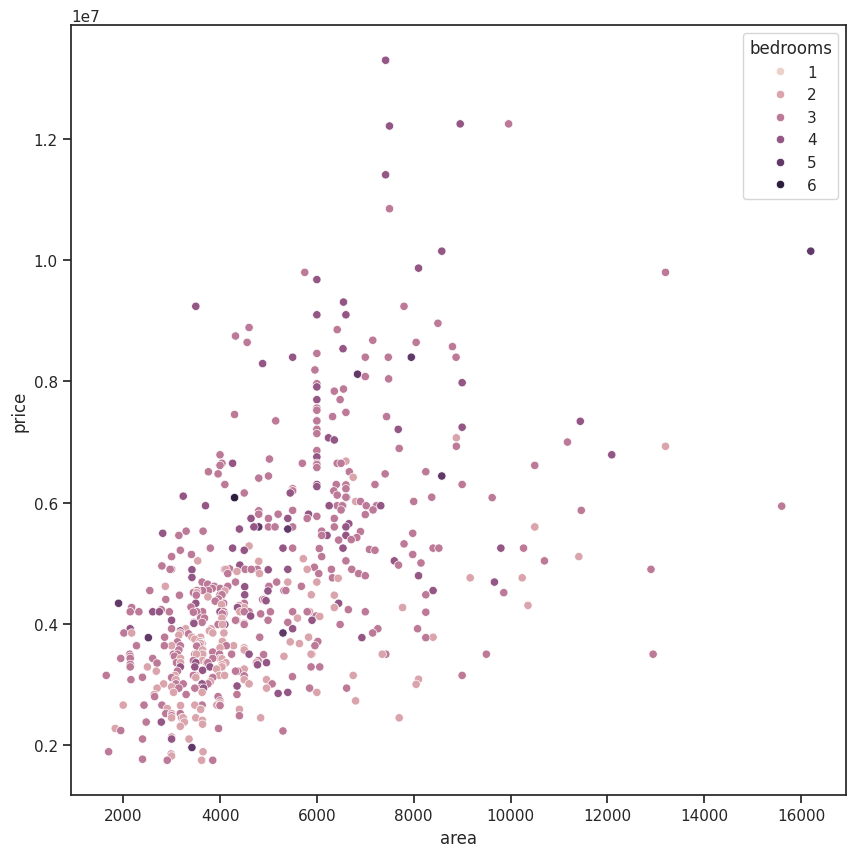

In [31]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='area', y='price', data=data, hue='bedrooms')

/tmp/ipykernel_119037/4104117168.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['area'])


<Axes: xlabel='area', ylabel='Density'>

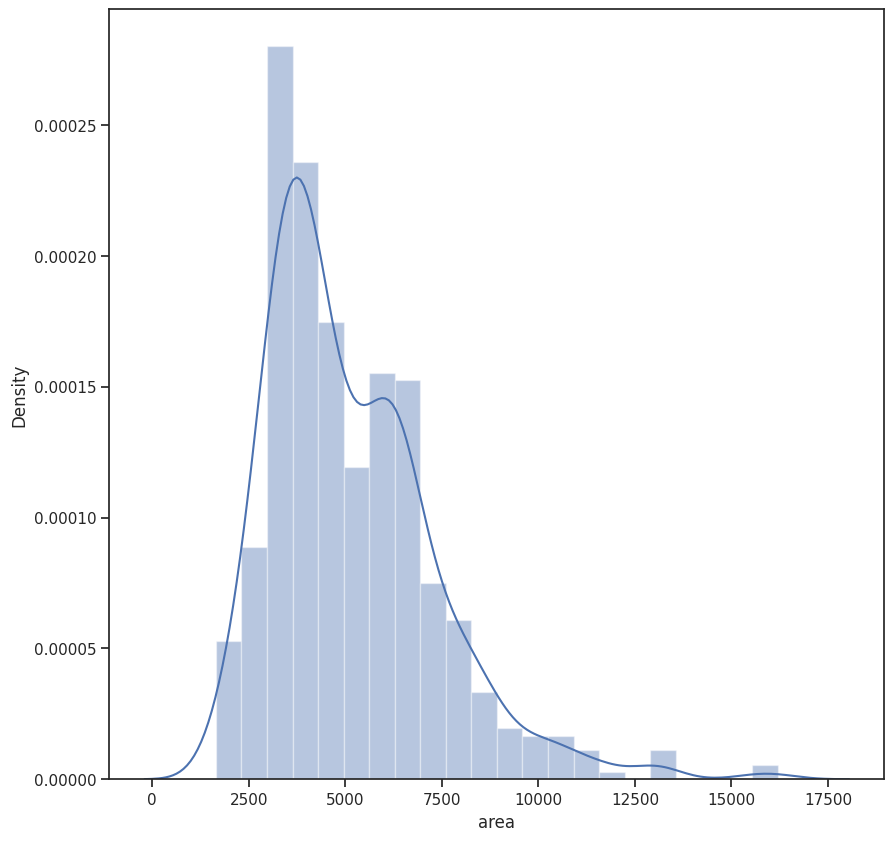

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['area'])

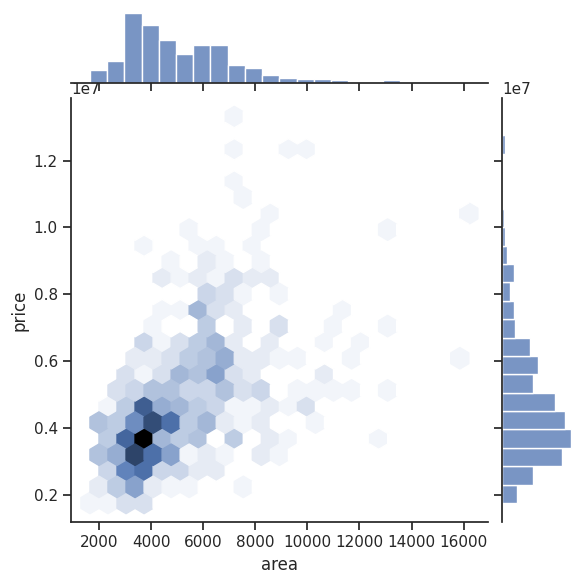

In [33]:
sns.jointplot(x='area', y='price', data=data, kind='hex')

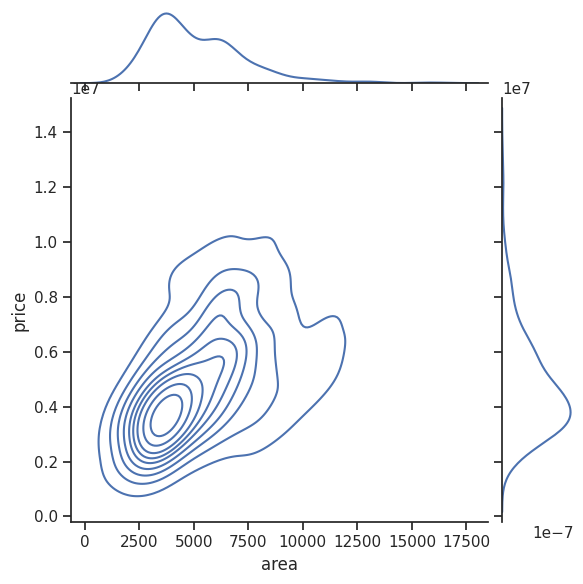

In [34]:
sns.jointplot(x='area', y='price', data=data, kind="kde")

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

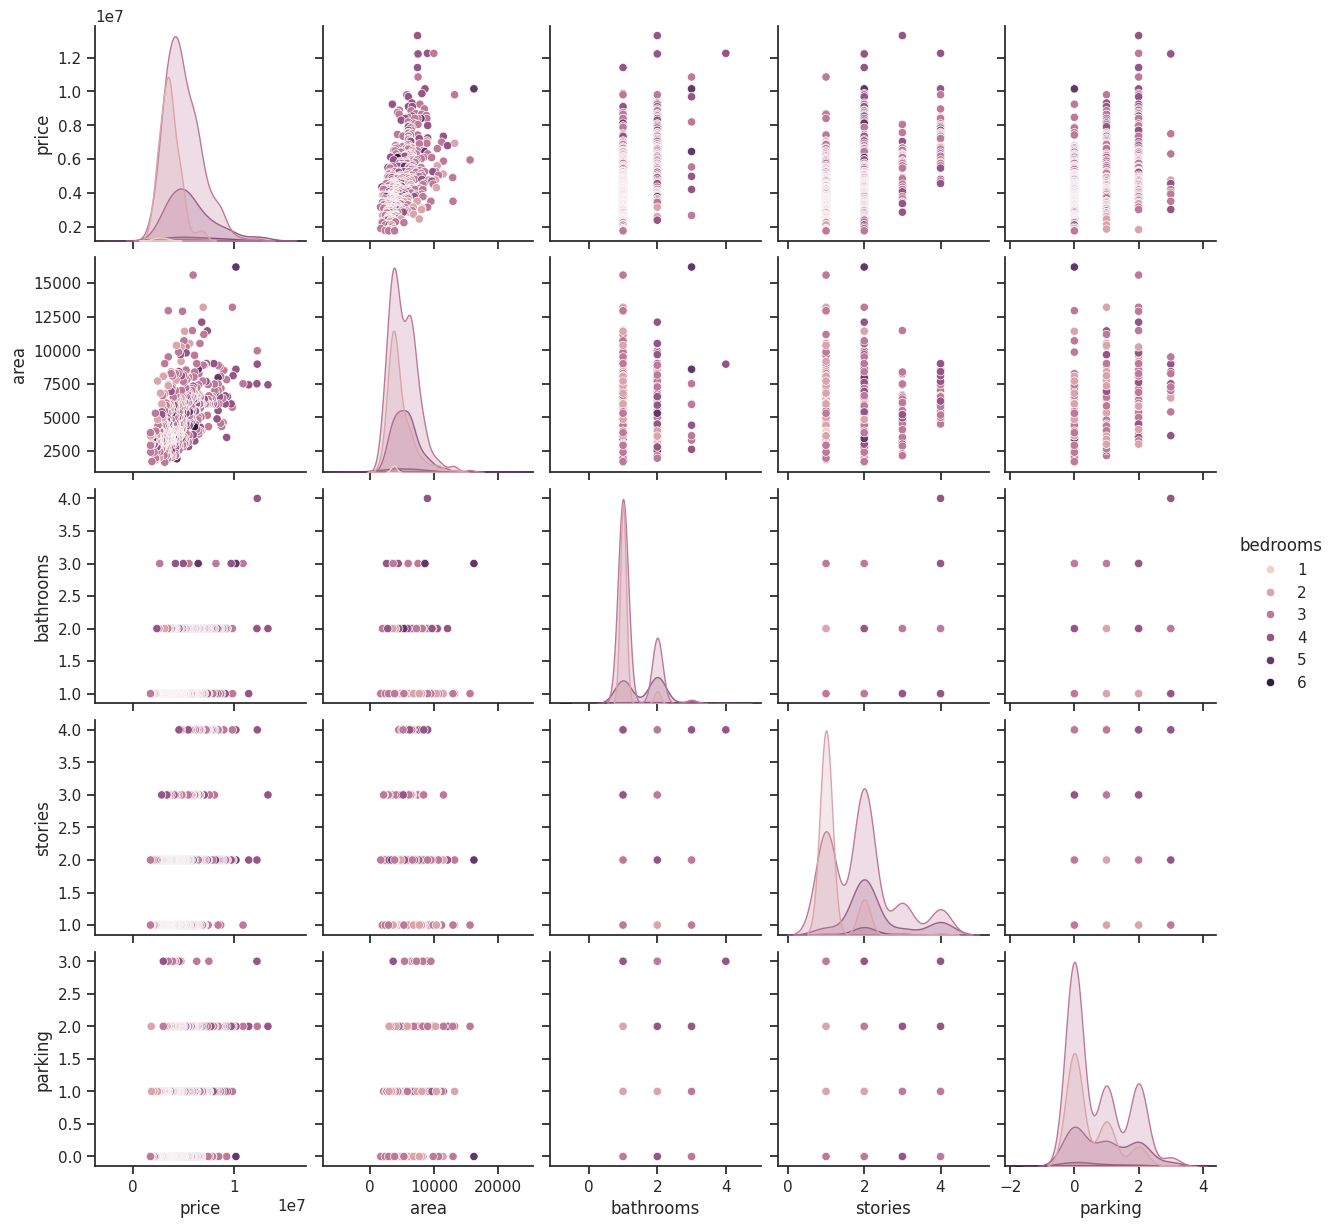

In [36]:
sns.pairplot(data, hue="bedrooms")

<Axes: ylabel='bedrooms'>

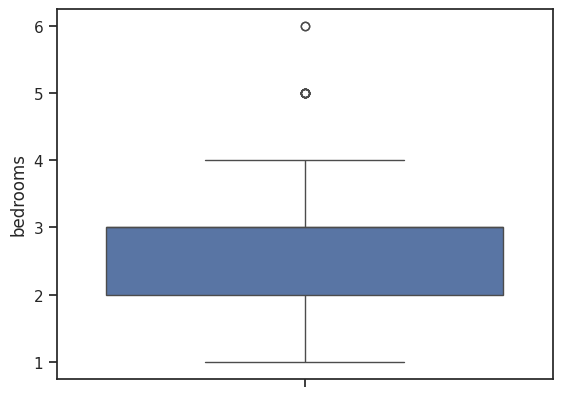

In [37]:
sns.boxplot(y=data['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='price'>

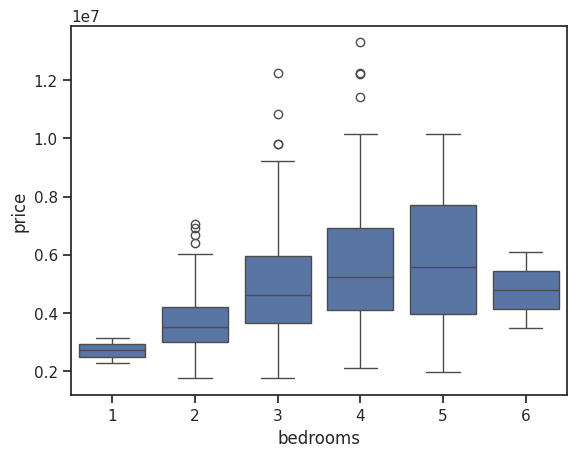

In [38]:
sns.boxplot(x='bedrooms', y='price', data=data)

# Информация о корреляции признаков

In [39]:
data.corr(numeric_only=True, method='pearson')

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [40]:
data.corr(numeric_only=True, method='kendall')

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.422227,0.306770,0.393023,0.286133,0.282781
area,0.422227,1.000000,0.135422,0.174605,0.047193,0.275404
bedrooms,0.306770,0.135422,1.000000,0.355017,0.450376,0.131042
bathrooms,0.393023,0.174605,0.355017,1.000000,0.289585,0.164047
stories,0.286133,0.047193,0.450376,0.289585,1.000000,0.016622
parking,0.282781,0.275404,0.131042,0.164047,0.016622,1.000000


In [41]:
data.corr(numeric_only=True, method='spearman')

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.602859,0.390454,0.479912,0.362856,0.365372
area,0.602859,1.000000,0.176198,0.213793,0.057768,0.353259
bedrooms,0.390454,0.176198,1.000000,0.377148,0.504291,0.146780
bathrooms,0.479912,0.213793,0.377148,1.000000,0.308769,0.173982
stories,0.362856,0.057768,0.504291,0.308769,1.000000,0.018389
parking,0.365372,0.353259,0.146780,0.173982,0.018389,1.000000


<Axes: >

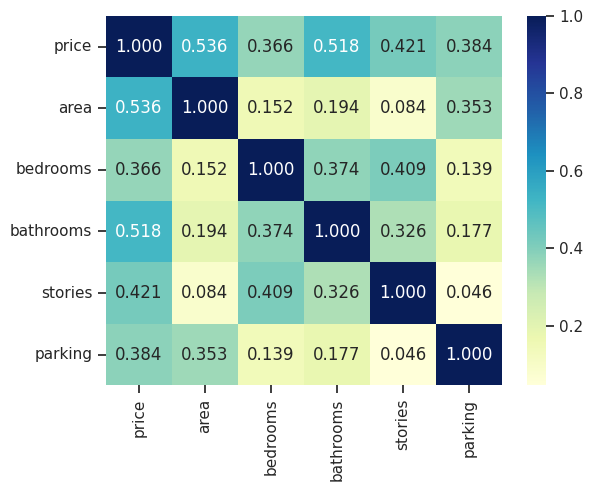

In [42]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='YlGnBu', fmt='.3f')